In [2]:
import json
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt


EXPORTS_DIR = Path.cwd().parent / "server" / "exports"


def _load_selection_labels(path: Path) -> list[str]:
    try:
        payload = json.loads(path.read_text(encoding="utf-8"))
    except Exception:
        return []

    selection = payload.get("selection", [])
    labels = []
    for item in selection:
        if isinstance(item, dict):
            label = item.get("label") or item.get("path") or ""
        else:
            label = str(item)
        label = Path(str(label)).name
        if label:
            labels.append(label)
    return labels


def analyze_exports() -> dict:
    json_files = sorted(EXPORTS_DIR.glob("*.json"))
    labels: list[str] = []
    for path in json_files:
        labels.extend(_load_selection_labels(path))

    if not labels:
        print("No selection labels found.")
        return {"most_used": None, "least_used": None, "distribution": {}}

    counts = Counter(labels)
    most_used = counts.most_common(1)[0]
    least_used = min(counts.items(), key=lambda item: item[1])

    print(f"Most used label: {most_used[0]} ({most_used[1]})")
    print(f"Least used label: {least_used[0]} ({least_used[1]})")

    labels_sorted = [label for label, _count in counts.most_common()]
    values = [counts[label] for label in labels_sorted]

    plt.figure(figsize=(10, 6))
    plt.bar(labels_sorted, values, color="#3366cc")
    plt.xticks(rotation=45, ha="right")
    plt.title("LUT Selection Distribution")
    plt.xlabel("LUT Label")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Most used label: arrakis_bmdfilm__lut3d_33.cube (14)
Least used label: bw9__lut3d_33.cube (1)


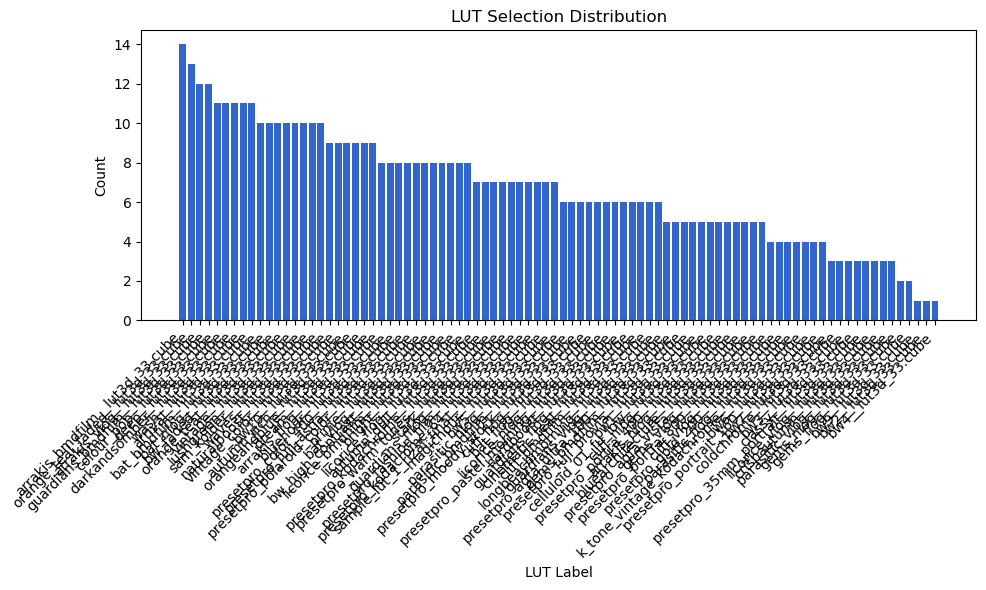

In [3]:
analyze_exports()

Top K: [('arrakis_bmdfilm__lut3d_33.cube', 14), ('orange_teal_faded__lut3d_33.cube', 13), ('arrakis_vlog__lut3d_33.cube', 12), ('guardians_bmdfilm__lut3d_33.cube', 12), ('colour_pop__lut3d_33.cube', 11), ('deep__lut3d_33.cube', 11), ('darkandsomber__lut3d_33.cube', 11), ('wash__lut3d_33.cube', 11)]
Least K: [('bw9__lut3d_33.cube', 1), ('bw2__lut3d_33.cube', 1), ('bw4__lut3d_33.cube', 1), ('gems_nlog__lut3d_33.cube', 2), ('gems_flog__lut3d_33.cube', 2), ('bw7__lut3d_33.cube', 3), ('coldchrome__lut3d_33.cube', 3), ('bw3__lut3d_33.cube', 3)]


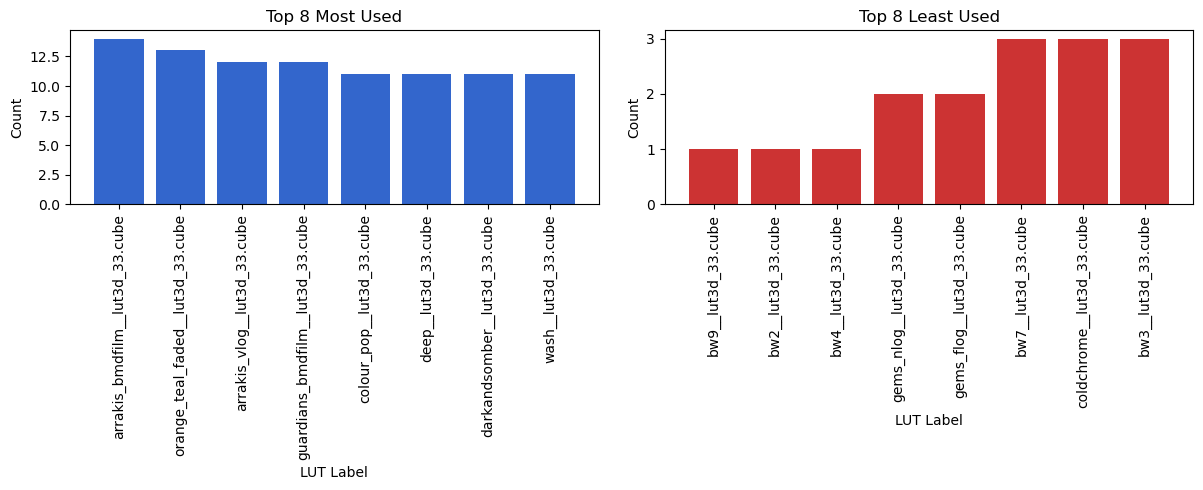

In [10]:
from collections import Counter

k = 8  # change as needed

json_files = sorted(EXPORTS_DIR.glob("*.json"))
labels: list[str] = []
for path in json_files:
    labels.extend(_load_selection_labels(path))

if not labels:
    print("No selection labels found.")
    top_k = []
    least_k = []
else:
    counts = Counter(labels)
    top_k = counts.most_common(k)
    least_k = sorted(counts.items(), key=lambda item: item[1])[:k]

    print("Top K:", top_k)
    print("Least K:", least_k)

    top_labels = [label for label, _ in top_k]
    top_values = [count for _, count in top_k]
    least_labels = [label for label, _ in least_k]
    least_values = [count for _, count in least_k]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].bar(top_labels, top_values, color="#3366cc")
    axes[0].set_title(f"Top {k} Most Used")
    axes[0].set_xlabel("LUT Label")
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis="x", rotation=90)

    axes[1].bar(least_labels, least_values, color="#cc3333")
    axes[1].set_title(f"Top {k} Least Used")
    axes[1].set_xlabel("LUT Label")
    axes[1].set_ylabel("Count")
    axes[1].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()


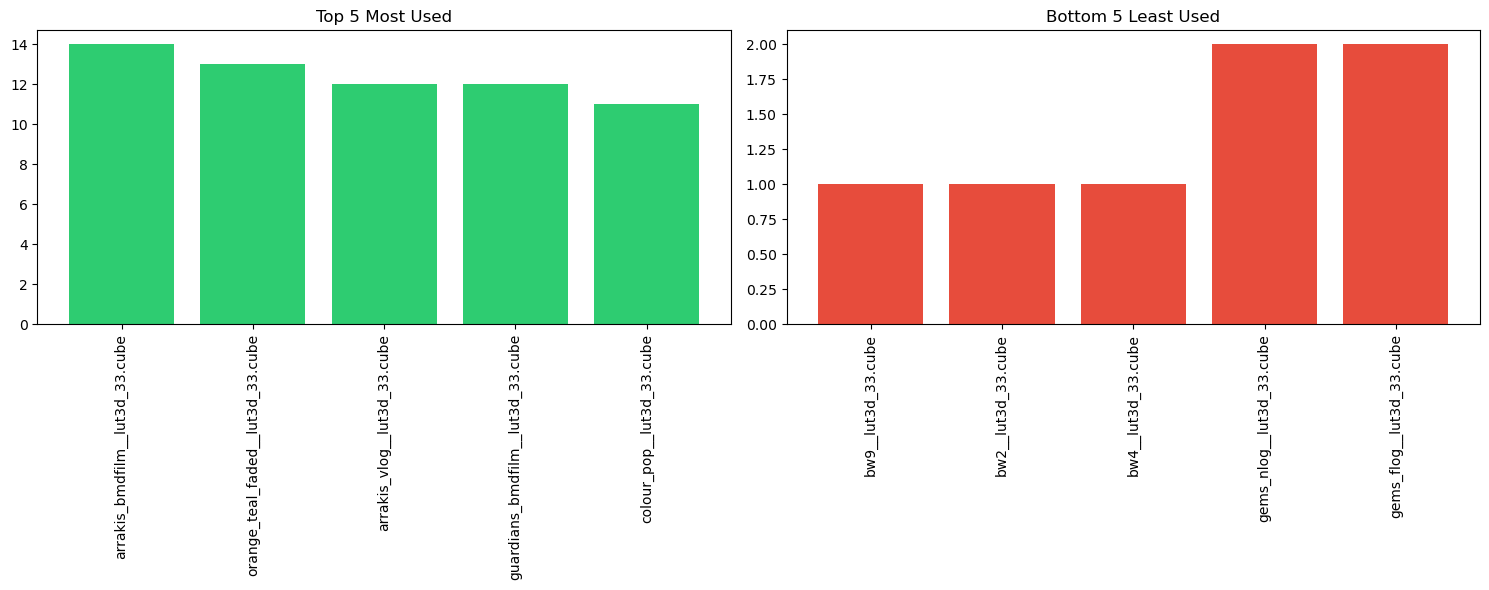

In [12]:
K = 5 # Set k value

# Extract top and bottom k
top_k = counts.most_common(K)
# Sort to ensure we get the absolute least frequent
least_k = sorted(counts.items(), key=lambda x: x[1])[:K]

# Variables for use elsewhere
top_labels, top_counts = zip(*top_k) if top_k else ([], [])
least_labels, least_counts = zip(*least_k) if least_k else ([], [])

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(top_labels, top_counts, color="#2ecc71")
ax1.set_title(f"Top {K} Most Used")
ax1.tick_params(axis='x', rotation=90)

ax2.bar(least_labels, least_counts, color="#e74c3c")
ax2.set_title(f"Bottom {K} Least Used")
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

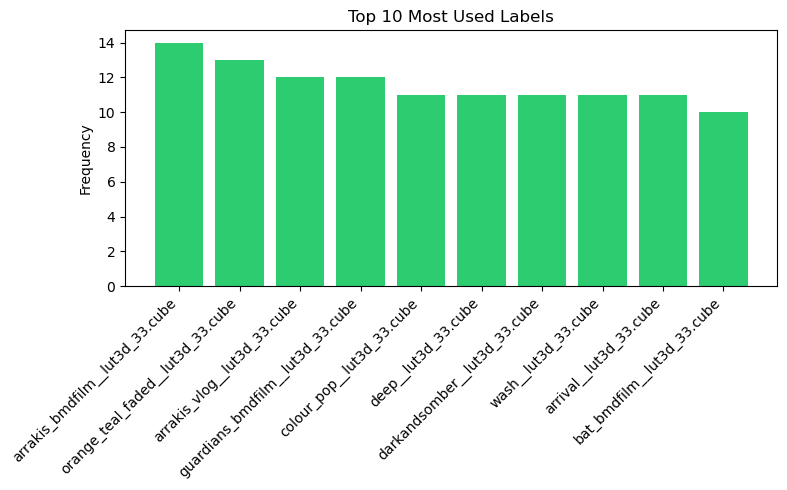

In [15]:
K = 10
top_k = counts.most_common(K)
top_labels, top_values = zip(*top_k) if top_k else ([], [])

plt.figure(figsize=(8, 5))
plt.bar(top_labels, top_values, color="#2ecc71")
plt.title(f"Top {K} Most Used Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

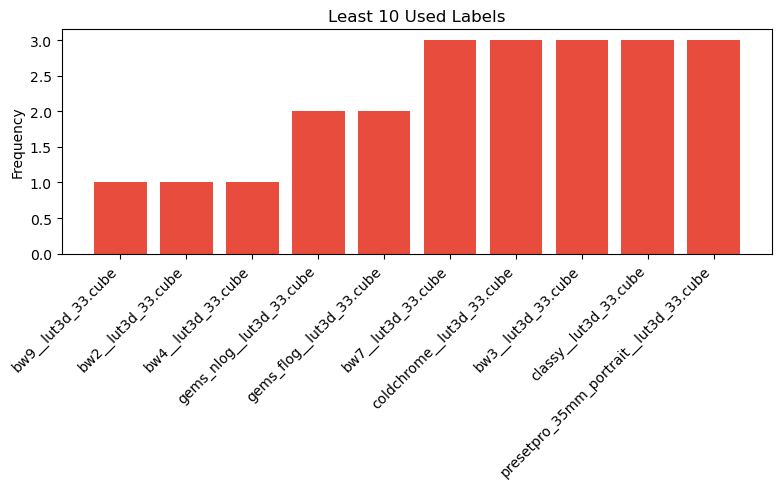

In [16]:
K = 10
# Sort ascending by count to find the least used
least_k = sorted(counts.items(), key=lambda x: x[1])[:K]
least_labels, least_values = zip(*least_k) if least_k else ([], [])

plt.figure(figsize=(8, 5))
plt.bar(least_labels, least_values, color="#e74c3c")
plt.title(f"Least {K} Used Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

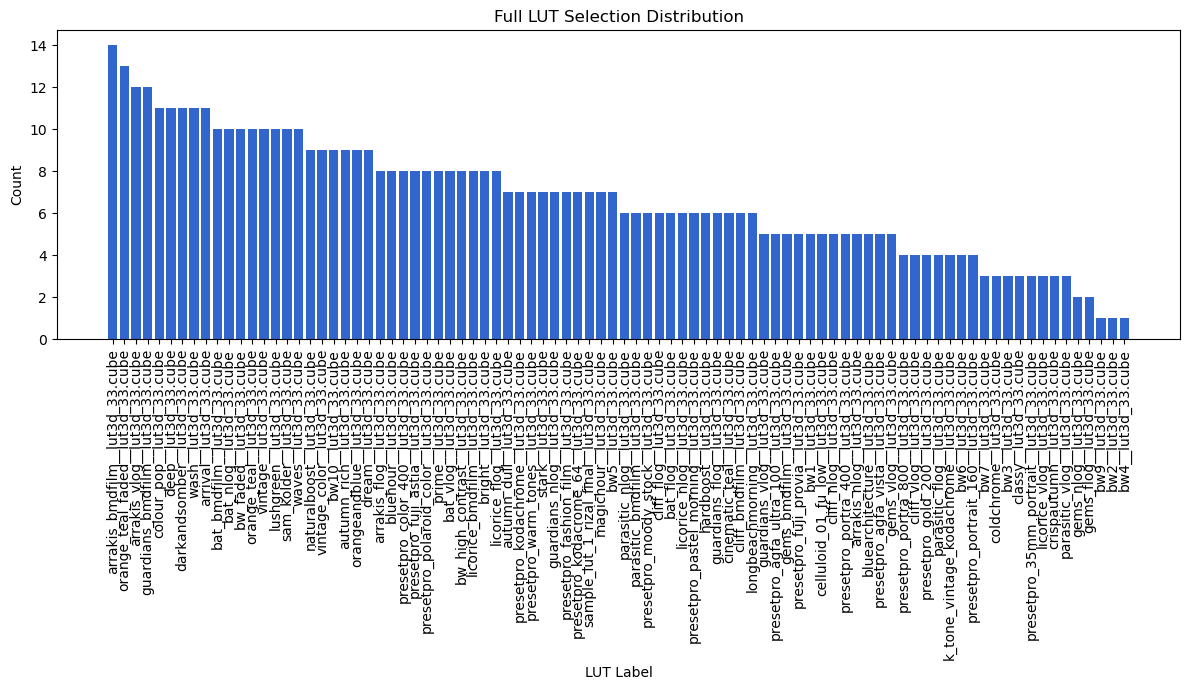

In [17]:
# Variables for the full distribution
labels_sorted, values_sorted = zip(*counts.most_common()) if counts else ([], [])

plt.figure(figsize=(12, 7))
plt.bar(labels_sorted, values_sorted, color="#3366cc")

# Set rotation to 90 degrees and ensure alignment
plt.xticks(rotation=90)

plt.title("Full LUT Selection Distribution")
plt.xlabel("LUT Label")
plt.ylabel("Count")

# tight_layout is essential for 90-degree labels to prevent clipping 
# at the bottom of the figure.
plt.tight_layout()
plt.show()

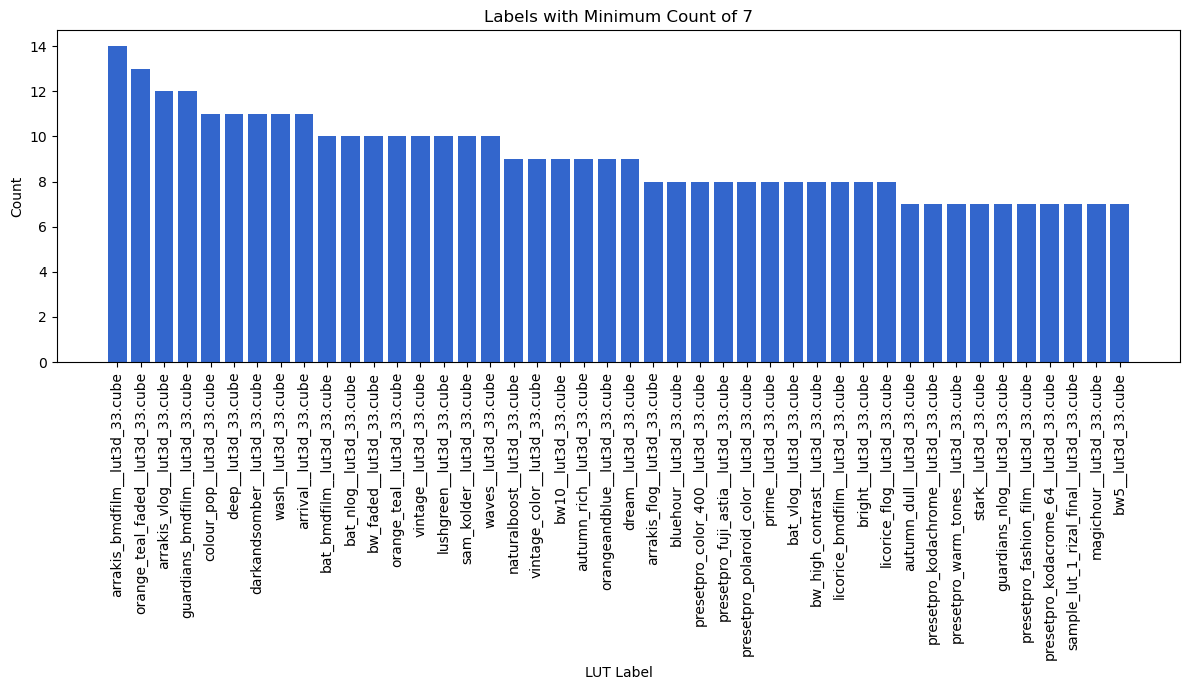

In [66]:
MIN_COUNT = 7 # Set your threshold here

# Filter and sort data
filtered_counts = {label: count for label, count in counts.items() if count >= MIN_COUNT}
sorted_items = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)

if not sorted_items:
    print(f"No labels found with a count >= {MIN_COUNT}")
else:
    labels_filtered, values_filtered = zip(*sorted_items)

    plt.figure(figsize=(12, 7))
    plt.bar(labels_filtered, values_filtered, color="#3366cc")

    plt.xticks(rotation=90)
    plt.title(f"Labels with Minimum Count of {MIN_COUNT}")
    plt.xlabel("LUT Label")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

In [23]:
def get_top_items(x: int) -> list[tuple[str, str]]:
    """
    Returns a list of tuples (name, path) for the top x most used items.
    """
    json_files = sorted(EXPORTS_DIR.glob("*.json"))
    
    # Track (label, path) pairs
    # We use the path as the key in the counter to ensure uniqueness
    item_pairs = []
    
    for path_obj in json_files:
        try:
            payload = json.loads(path_obj.read_text(encoding="utf-8"))
            selection = payload.get("selection", [])
            
            for item in selection:
                if isinstance(item, dict):
                    lbl = item.get("label") or ""
                    pth = item.get("path") or ""
                    if lbl or pth:
                        item_pairs.append((lbl, pth))
        except Exception:
            continue

    if not item_pairs:
        return []

    # Count occurrences of the (label, path) tuple
    counts = Counter(item_pairs)
    
    # most_common returns list of ((label, path), count)
    top_common = counts.most_common(x)
    
    # Transform into list of (label, path)
    return [item[0] for item in top_common]

# Usage
# top_x_info = get_top_items(5)
# for name, path in top_x_info:
#     print(f"Name: {name}, Path: {path}")

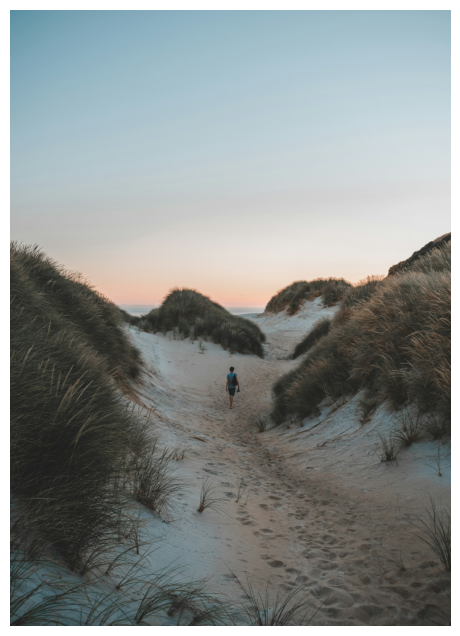

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = Path.cwd().parent / "./_raw_images/_7RIlgQ9HTQ.jpg"

img = mpimg.imread(img_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")  # Removes axis ticks and labels
plt.show()

In [82]:
from IPython.display import HTML, display

def display_image_grid(image_urls: list[str], items_per_row: int = 5) -> None:
    """
    Displays a list of Data URL images in a grid layout within a notebook cell.
    """
    if not image_urls:
        print("No images to display.")
        return

    # Filter to first 10 images if list is longer
    images_to_show = image_urls

    # Create a flexbox container for the grid
    html_str = '<div style="display: flex; flex-wrap: wrap; gap: 10px; justify-content: flex-start;">'
    
    for url in images_to_show:
        html_str += (
            f'<div style="flex: 1 0 18%; max-width: 200px; margin-bottom: 10px;">'
            f'<img src="{url}" style="width: 100%; border: 1px solid #ddd; border-radius: 4px;"/>'
            f'</div>'
        )
    
    html_str += '</div>'
    
    display(HTML(html_str))

In [91]:
from pathlib import Path
import sys

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from libs.lut_api_final import apply_luts_as_data_urls

top_x_info = get_top_items(50)
top_paths = []

for _, p in top_x_info:
    top_paths.append(p)


results = apply_luts_as_data_urls(img_path, top_paths, 300)
names = [d["lut"] for d in results]
results = [d["data_url"] for d in results]



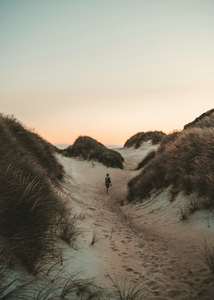
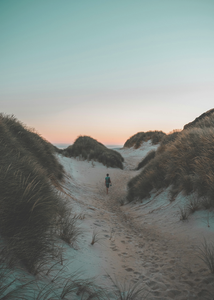
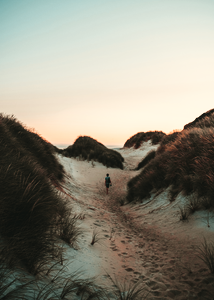
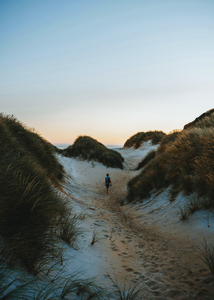
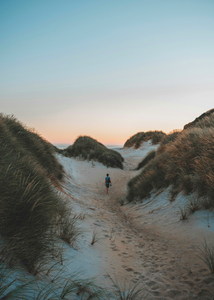
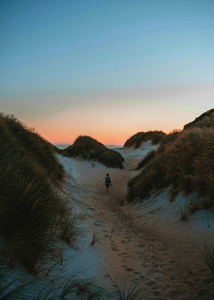
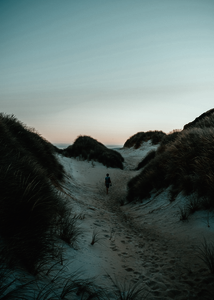
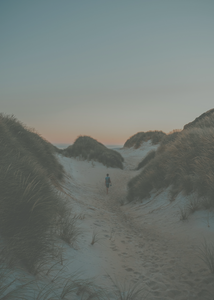
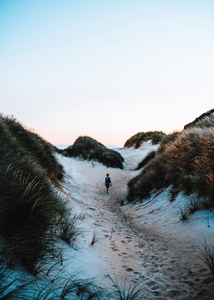
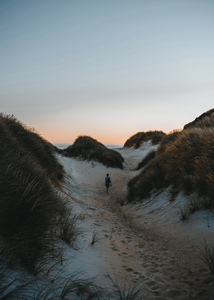
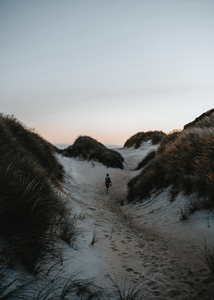
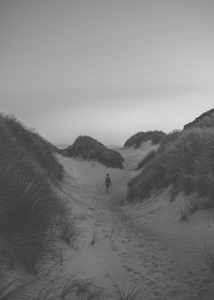
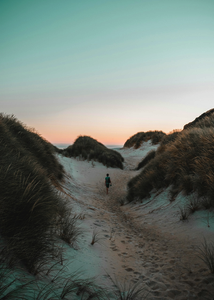
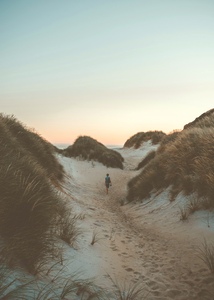
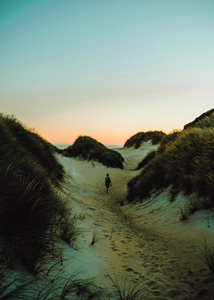
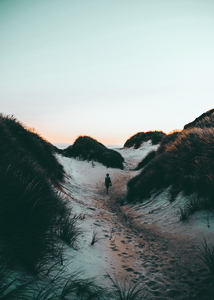
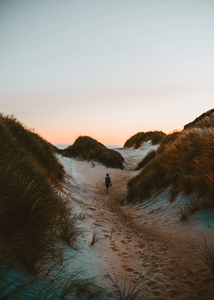
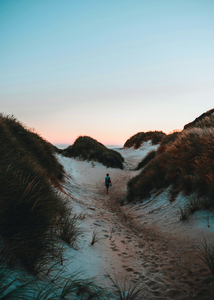
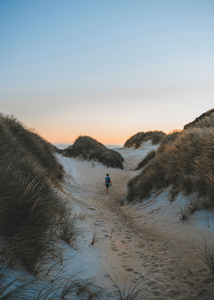
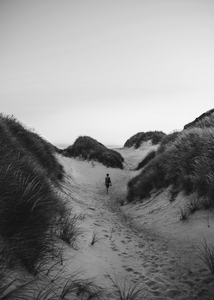
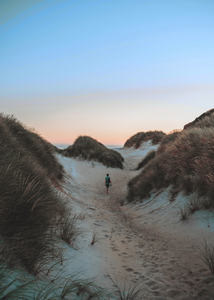
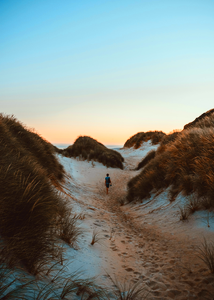
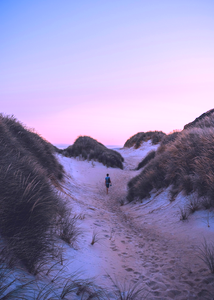
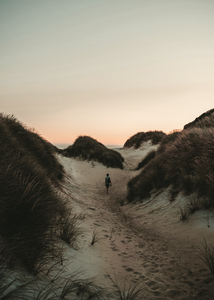
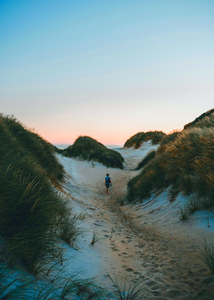
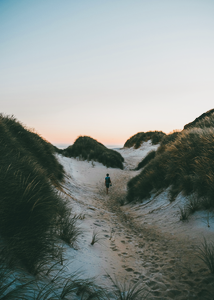
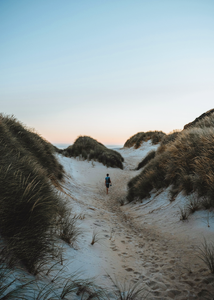
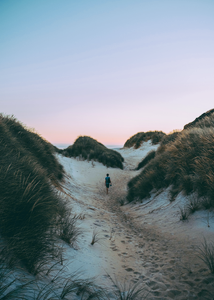
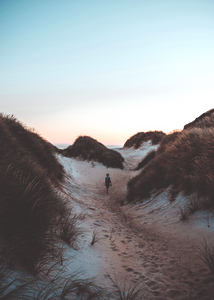
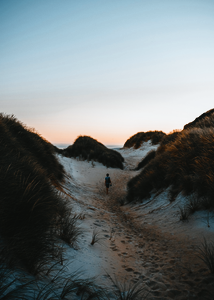
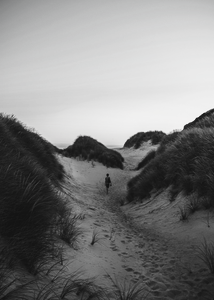
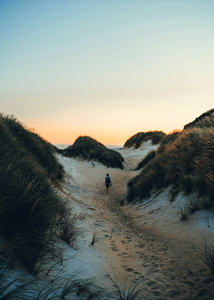
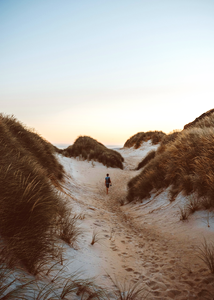
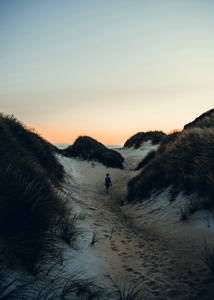
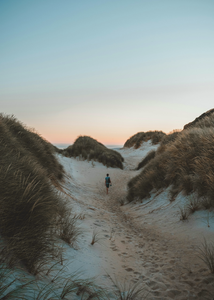
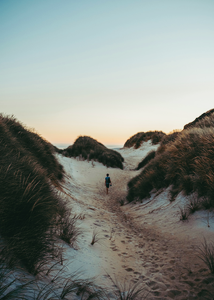
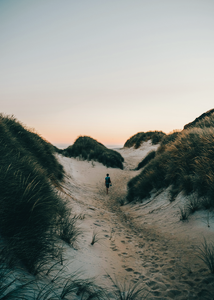
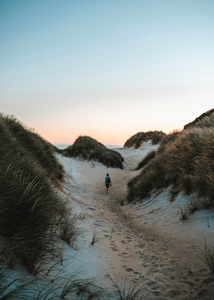
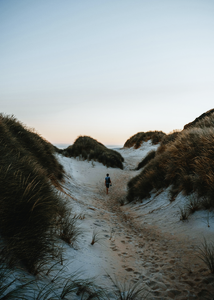
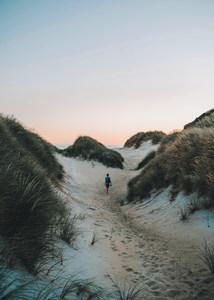
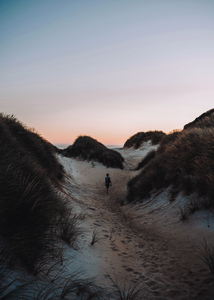
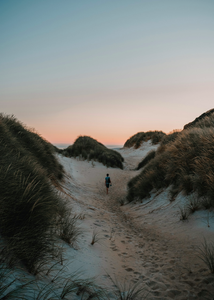
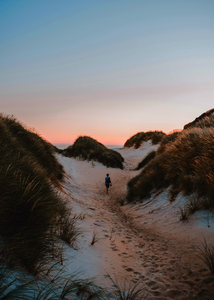
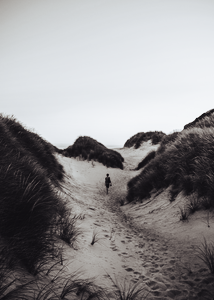
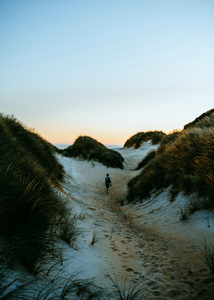
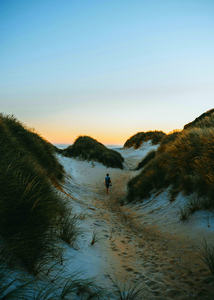
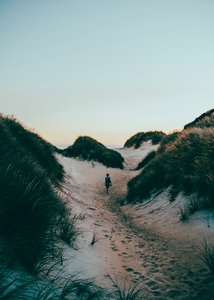
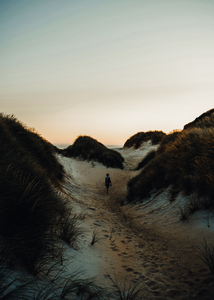
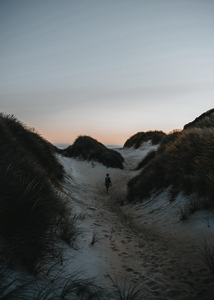
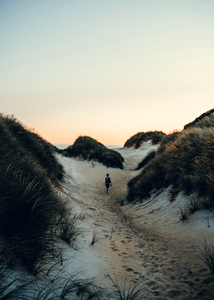

In [92]:
display_image_grid(results)

In [93]:
cols = 4
col_width = 30 

# Clean the names for display
clean_names = [n.split("__")[0].replace("_", " ").title() for n in names]

for i in range(0, len(clean_names), cols):
    row = clean_names[i : i + cols]
    print("".join(f"• {name:<{col_width}}" for name in row))

• Arrakis Bmdfilm               • Orange Teal Faded             • Arrakis Vlog                  • Guardians Bmdfilm             
• Colour Pop                    • Deep                          • Darkandsomber                 • Wash                          
• Arrival                       • Bat Bmdfilm                   • Bat Nlog                      • Bw Faded                      
• Orange Teal                   • Vintage                       • Lushgreen                     • Sam Kolder                    
• Waves                         • Naturalboost                  • Vintage Color                 • Bw10                          
• Autumn Rich                   • Orangeandblue                 • Dream                         • Arrakis Flog                  
• Bluehour                      • Presetpro Color 400           • Presetpro Fuji Astia          • Presetpro Polaroid Color      
• Prime                         • Bat Vlog                      • Bw High Contrast              •

In [94]:
import json

# Extract paths into a flat list
paths_list = top_paths

# Write to a file
with open("./exported_paths.json", "w", encoding="utf-8") as f:
    json.dump(paths_list, f, indent=4)

print(f"Exported {len(paths_list)} paths to exported_paths.json")

Exported 50 paths to exported_paths.json
